In [10]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [11]:

np.random.seed(0)
n = 100  # Number of observations

In [12]:
#Generate age an years until retirenment
age = np.random.normal(40, 5, n)
years_until_retirement = 60 - age  # years until retirement is 60 - age


In [13]:
# Generate salary based on age, years until retirement, and random noise
salary = 3000 + 200 * age - 400 * years_until_retirement + np.random.normal(0, 1000, n)


In [14]:
# Create a DataFrame
data = pd.DataFrame({
    'Age': age,
    'Years_until_Retirement': years_until_retirement,
    'Salary': salary
})

In [15]:
data

,Age,Years_until_Retirement,Salary
0,48.820262,11.179738,10175.307735
1,42.000786,17.999214,2852.712564
2,44.893690,15.106310,4665.728954
3,51.204466,8.795534,10692.076306
4,49.337790,10.662210,7429.550565
...,...,...,...
95,43.532866,16.467134,4948.173173
96,40.052500,19.947500,3803.290613
97,48.929352,11.070648,9181.115636
98,40.634560,19.365440,5543.972227


In [21]:
#fit a multiplt linear regression model
X = data[['Age', 'Years_until_Retirement']]
X

,Age,Years_until_Retirement
0,48.820262,11.179738
1,42.000786,17.999214
2,44.893690,15.106310
3,51.204466,8.795534
4,49.337790,10.662210
...,...,...
95,43.532866,16.467134
96,40.052500,19.947500
97,48.929352,11.070648
98,40.634560,19.365440


In [23]:
y = data['Salary']
y

0     10175.307735
1      2852.712564
2      4665.728954
3     10692.076306
4      7429.550565
          ...     
95     4948.173173
96     3803.290613
97     9181.115636
98     5543.972227
99     5542.496040
Name: Salary, Length: 100, dtype: float64

In [32]:
#fit the regression model
model = sm.OLS(y,X).fit()
model

In [34]:
#print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     913.5
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           1.79e-51
Time:                        13:45:59   Log-Likelihood:                -835.45
No. Observations:                 100   AIC:                             1675.
Df Residuals:                      98   BIC:                             1680.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Age                      258

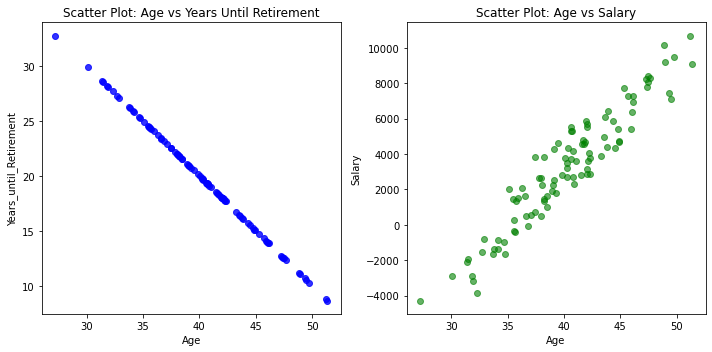

In [39]:
# Scatter plot to visualize negative multicollinearity
plt.figure(figsize=(10, 5))

# Plot Age vs. Years_until_Retirement
plt.subplot(1, 2, 1)
plt.scatter(age, years_until_retirement, color='b', alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Years_until_Retirement')
plt.title('Scatter Plot: Age vs Years Until Retirement')


# Plot Age vs. Salary
plt.subplot(1, 2, 2)
plt.scatter(age, salary, color='g', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Scatter Plot: Age vs Salary')

plt.tight_layout()
plt.show()


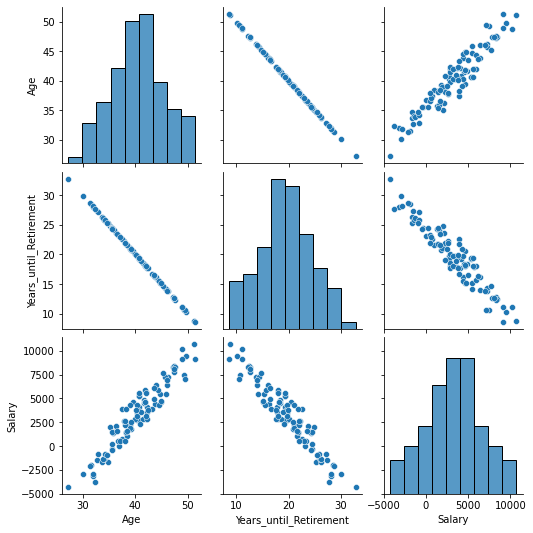

In [41]:
import seaborn as sns

# Pairplot for visualization
sns.pairplot(data[['Age', 'Years_until_Retirement', 'Salary']])
plt.show()